In [27]:
# all of the packages we will need and use

from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
import win32api as wp
import os
import re
import io
import cv2 as cv2

from matplotlib import pyplot as plt
from matplotlib import image
import matplotlib.patches as mpatches
from PIL import Image
import argparse
import imutils
import glob
import random
import time

from skimage import data
from skimage import io
import skimage.data as data
import skimage.segmentation as seg
from skimage.segmentation import clear_border
import skimage.filters as filters
from skimage.filters import threshold_otsu
import skimage.draw as draw
import skimage.color as color
from skimage.color import label2rgb
from skimage.measure import label, regionprops
from skimage.morphology import closing, square, opening

In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [26]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)


Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [27]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


In [28]:
# day 1 - 06/01/20

path = wp.GetShortPathName("C:/Users/marce/Documents" \
                           "/interpromo_2020/AllData/SEATGURU_INFO_AIRCRAFT.csv")

In [29]:
data = pd.read_csv(path)
df = pd.DataFrame.from_csv(path, encoding='utf-8', sep=";")
dfetud = df[6000:7000]

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


In [30]:
dfetud['Aircraft_Type'] = (dfetud['Aircraft_Type'].str.replace(r' ', '_'))

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
dfetud['nom'] = dfetud['Airline_name'].str.cat(dfetud['Aircraft_Type'],sep="_")

C:\Users\marce\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
list__type = dfetud['nom'].unique()

In [33]:
listeall = os.listdir("C:/Users/marce/Documents/interpromo_2020"
                      "/AllData/ANALYSE IMAGE/LAYOUT SEATGURU")
listeall

['Aegean_Airlines_Airbus_A319-100_plane1.svg.png',
 'Aegean_Airlines_Airbus_A320-200_plane2.svg.png',
 'Aegean_Airlines_Airbus_A321-200_plane1.svg.png',
 'Aegean_Airlines_Airbus_A321-200_plane3.svg.png',
 'Aegean_Airlines_ATR_42-600_plane2.svg.png',
 'Aegean_Airlines_ATR_42-600_plane4.svg.png',
 'Aegean_Airlines_Bombardier_Dash_8_Q400_plane3.svg.png',
 'Aegean_Airlines_Bombardier_Dash_8_Q400_plane5.svg.png',
 'Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A320_plane7.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A320_V2_plane8.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A321_plane9.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A321_V2_plane10.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A321_V3_plane11.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A330_300_V2_plane4.jpg',
 'Aeroflot_Russian_Airlines_Airbus_A330_300_V3_plane5.jpg',
 'Aeroflot_Russian_Airlines_Boeing_737-800_plane12.svg.png',
 'Aeroflot_Russian_Airlines_Boeing_777-300ER_plane6.jpg',
 'Aeroflot_Russia

In [34]:
# list comparator

results = []
for x in list__type:
    pattern = re.compile("x")
for texte in listeall:
    if pattern.search(texte):
        results.append(texte)
results = list(set(results))

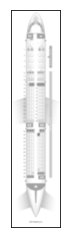

In [35]:
# pattern matching - jet 1

path_im = wp.GetShortPathName("C:/Users/marce/Documents/"
                              "interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/"
                              "Aeroflot_Russian_Airlines_Airbus_A321_V3_plane11.jpg")


img = cv2.imread(path_im, 0)
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [36]:
# day 2 - 07/01/20

# simple seats recognition - jet 1

path_im = wp.GetShortPathName("C:/Users/marce/Documents/"
                              "interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/"
                              "Aeroflot_Russian_Airlines_Airbus_A321_V3_plane11.jpg")
path_t = wp.GetShortPathName("C:/Users/marce/Documents/"
                             "ProjetInterpromo2020G8/images/templateTest.jpg")

img_rgb = cv2.imread(path_im, 0)
# if image is in rgb, use those next lines :
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# cv2.imshow('first',img_rgb)
# cv2.waitKey(0)
# gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

template = cv2.imread(path_im, 0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_rgb, template, cv2.TM_CCOEFF_NORMED)
sin_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
threshold = 0.6
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
# to add +50 pixels on the limits of the rectangle, use those next lines :
# bottom_right=(top_left[0]+50,top_left[1]+50)
# cv2.rectangle(res, top_left, bottom_right, (0,255,0),5)

cv2.imshow('object found', img_rgb)
cv2.waitKey(0)

# conclusion : template needs to be clipped.

error: (2, 'GetShortPathNameW', 'Le fichier spécifié est introuvable.')

In [ ]:
# simple seats recognition - jet 2

img_rgb = cv2.imread(path_im, 0)
# to change rgb to gray image :
# img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
# cv2.imshow('first',img_rgb)
# cv2.waitKey(0)

template = cv2.imread(path_t, 0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_rgb, template, cv2.TM_CCOEFF_NORMED)
sin_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
top_left = max_loc
threshold = 0.6
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
# on augmente les limites du rectangle de reconnaissance de 50 pixels
# bottom_right=(top_left[0]+40,top_left[1]+40)
# cv2.rectangle(res, top_left, bottom_right, (0,255,0),5)

cv2.imshow('object found', img_rgb)
cv2.waitKey(0)

In [ ]:
path_t = wp.GetShortPathName("C:/Users/marce/Documents/"
                             "ProjetInterpromo2020G8/images/temp_restau.jpg")

# charge the template, convert in gray, detection of borders
template = cv2.imread(path_t)
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
template = cv2.Canny(template, 50, 200)
(tH, tW) = template.shape[:2]
cv2.imshow("Template", template)
cv2.waitKey(0)

In [ ]:
# day 3 - 08/01/2020


# Use of OpenCV and Mask R-CNN


# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
                help="path to input image")
ap.add_argument("-m", "--mask-rcnn", required=True,
                help="base path to mask-rcnn directory")
ap.add_argument("-v", "--visualize", type=int, default=0,
                help="whether or not we are going to visualize each instance")
ap.add_argument("-c", "--confidence", type=float, default=0.5,
                help="minimum probability to filter weak detections")
ap.add_argument("-t", "--threshold", type=float, default=0.3,
                help="minimum threshold for pixel-wise mask segmentation")
args = vars(ap.parse_args())

# load the COCO class labels our Mask R-CNN was trained on
labelsPath = os.path.sep.join([args["mask_rcnn"],
                               "object_detection_classes_coco.txt"])
LABELS = open(labelsPath).read().strip().split("\n")

# /!\ no class labels for searched objects, this method can't work here.

# load the set of colors that will be used when visualizing a given
# instance segmentation
colorsPath = os.path.sep.join([args["mask_rcnn"], "colors.txt"])
COLORS = open(colorsPath).read().strip().split("\n")
COLORS = [np.array(c.split(",")).astype("int") for c in COLORS]
COLORS = np.array(COLORS, dtype="uint8")

# error : an exception has occurred, use %tb to see the full traceback
# see https://www.pyimagesearch.com/2018/11/19/mask-r-cnn-with-opencv/
# the error is an aknowledged bug of OpenCV

In [ ]:
# Use of OpenCV et Image Segmentation with Watershed Algorithm

path_im = wp.GetShortPathName("C:/Users/marce/Documents/"
                              "interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/"
                              "Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg")

# from rgb to gray function


def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])


img = cv2.imread(path_im)
# cv.IMREAD_grayscale
# gray = cv.cvtColor(imgcopy,cv.COLOR_BGR2GRAY)
gray = rgb2gray(img)
gray = gray.reshape((gray.shape, 1))
print(gray.shape)
# imgcopy = img.apply(lambda x : np.uint32(x))
imgcopy = np.uint32(gray)
# ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
cv2.imshow("Image", thresh)
cv2.waitKey(0)

# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations=2)

# sure background area
sure_bg = cv.dilate(opening, kernel, iterations=3)

# Finding sure foreground area
dist_transform = cv.distanceTransform(opening, cv.DIST_L2, 5)
ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
cv2.imshow("Image", markers)
cv2.waitKey(0)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0
markers = cv.watershed(img, markers)
img[markers == -1] = [255, 0, 0]


# problems occured to convert from CV_U16S to CV_32S on the Marker labelling part
# too much problems with OpenCV for image segmentation

In [ ]:
# use of scikit-image for image segmentation
# the latest version of numpy is incompatible with the current scikit-image version.
# incompatibility with numpy 1.16.0 => use an inferior version
# it works with numpy version 1.15.0.

image_load = plt.imread("C:/Users/marce/Documents/interpromo_2020/"
                        "AllData/ANALYSE IMAGE/LAYOUT SEATGURU/"
                        "Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg")

im = cv2.cvtColor(image_load, cv2.COLOR_BGR2GRAY)
plt.imshow(im)

# histogram of the image


def image_show(im, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax


image_show(im)

# histogram description
fig, ax = plt.subplots(1, 1)
ax.hist(image.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256)

img = cv2.imread("C:/Users/marce/Documents/interpromo_2020/"
                 "AllData/ANALYSE IMAGE/LAYOUT SEATGURU/"
                 "Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg")


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


def circle_points(resolution, center, radius):
    """
    Generate points which define a circle on an image.Centre refers to the centre of the circle
    """
    radians = np.linspace(0, 2*np.pi, resolution)
    c = center[1] + radius*np.cos(radians)  # polar co-ordinates
    r = center[0] + radius*np.sin(radians)

    return np.array([c, r]).T


# Exclude last point because a closed path should not have duplicate points
points = circle_points(300, [185, 165], 30)[:-1]

#fig, ax = image_show(gray)
ax.plot(points[:, 0], points[:, 1], '--r', lw=2)

# use of snake method
snake = seg.active_contour(gray, points)
#fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

# smoothen the edges
snake = seg.active_contour(gray, points, alpha=0.06, beta=0.3)
#fig, ax = image_show(img)
ax.plot(points[:, 0], points[:, 1], '--r', lw=3)
ax.plot(snake[:, 0], snake[:, 1], '-b', lw=3)

image_labels = np.zeros(gray.shape, dtype=np.uint8)
image_labels

indices = draw.circle_perimeter(187, 165, 20)
image_labels[indices] = 1
image_labels[points[:, 1].astype(np.int), points[:, 0].astype(np.int)] = 2

image_segmented = seg.random_walker(gray, image_labels)
#ax.imshow(image_segmented == 1, alpha=0.3)
fig, ax = image_show(gray)
image_segmented = seg.random_walker(gray, image_labels, beta=3000)

# Reconnaissance de patterns ; Label image regions avec scikit-image et non pas OpenCV /!\ 

In [53]:
# import the necessary packages

from skimage.measure import label, regionprops
import numpy as np
import pandas as pd
import os
import cv2 as cv2

from matplotlib import pyplot as plt
from matplotlib import image
import matplotlib.patches as mpatches

from skimage import io
import skimage.segmentation as seg
from skimage.segmentation import clear_border
import skimage.filters as filters
from skimage.filters import threshold_otsu, threshold_minimum
import skimage.draw as draw
import skimage.color as color
from skimage.color import label2rgb
from skimage.measure import label, regionprops
from skimage.morphology import closing, square

C:\Users\marce\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True
C:\Users\marce\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True


[(177, 162, 199, 181),
 (182, 239, 192, 256),
 (236, 258, 258, 268),
 (239, 271, 256, 278),
 (243, 142, 253, 159),
 (243, 200, 253, 217),
 (283, 332, 294, 342),
 (301, 332, 313, 341),
 (319, 333, 331, 341),
 (355, 332, 366, 341),
 (373, 333, 384, 341),
 (391, 333, 403, 341),
 (409, 333, 421, 341),
 (448, 139, 467, 156),
 (448, 267, 467, 284),
 (453, 203, 463, 219),
 (501, 203, 511, 219),
 (902, 333, 913, 342),
 (919, 332, 931, 342),
 (937, 332, 949, 343),
 (951, 264, 975, 285),
 (955, 136, 973, 144),
 (955, 150, 973, 157),
 (956, 332, 967, 342),
 (973, 332, 985, 343),
 (992, 331, 1003, 343),
 (1018, 202, 1028, 218),
 (1438, 136, 1456, 144),
 (1438, 262, 1456, 270),
 (1443, 203, 1453, 220),
 (1513, 203, 1523, 220)]

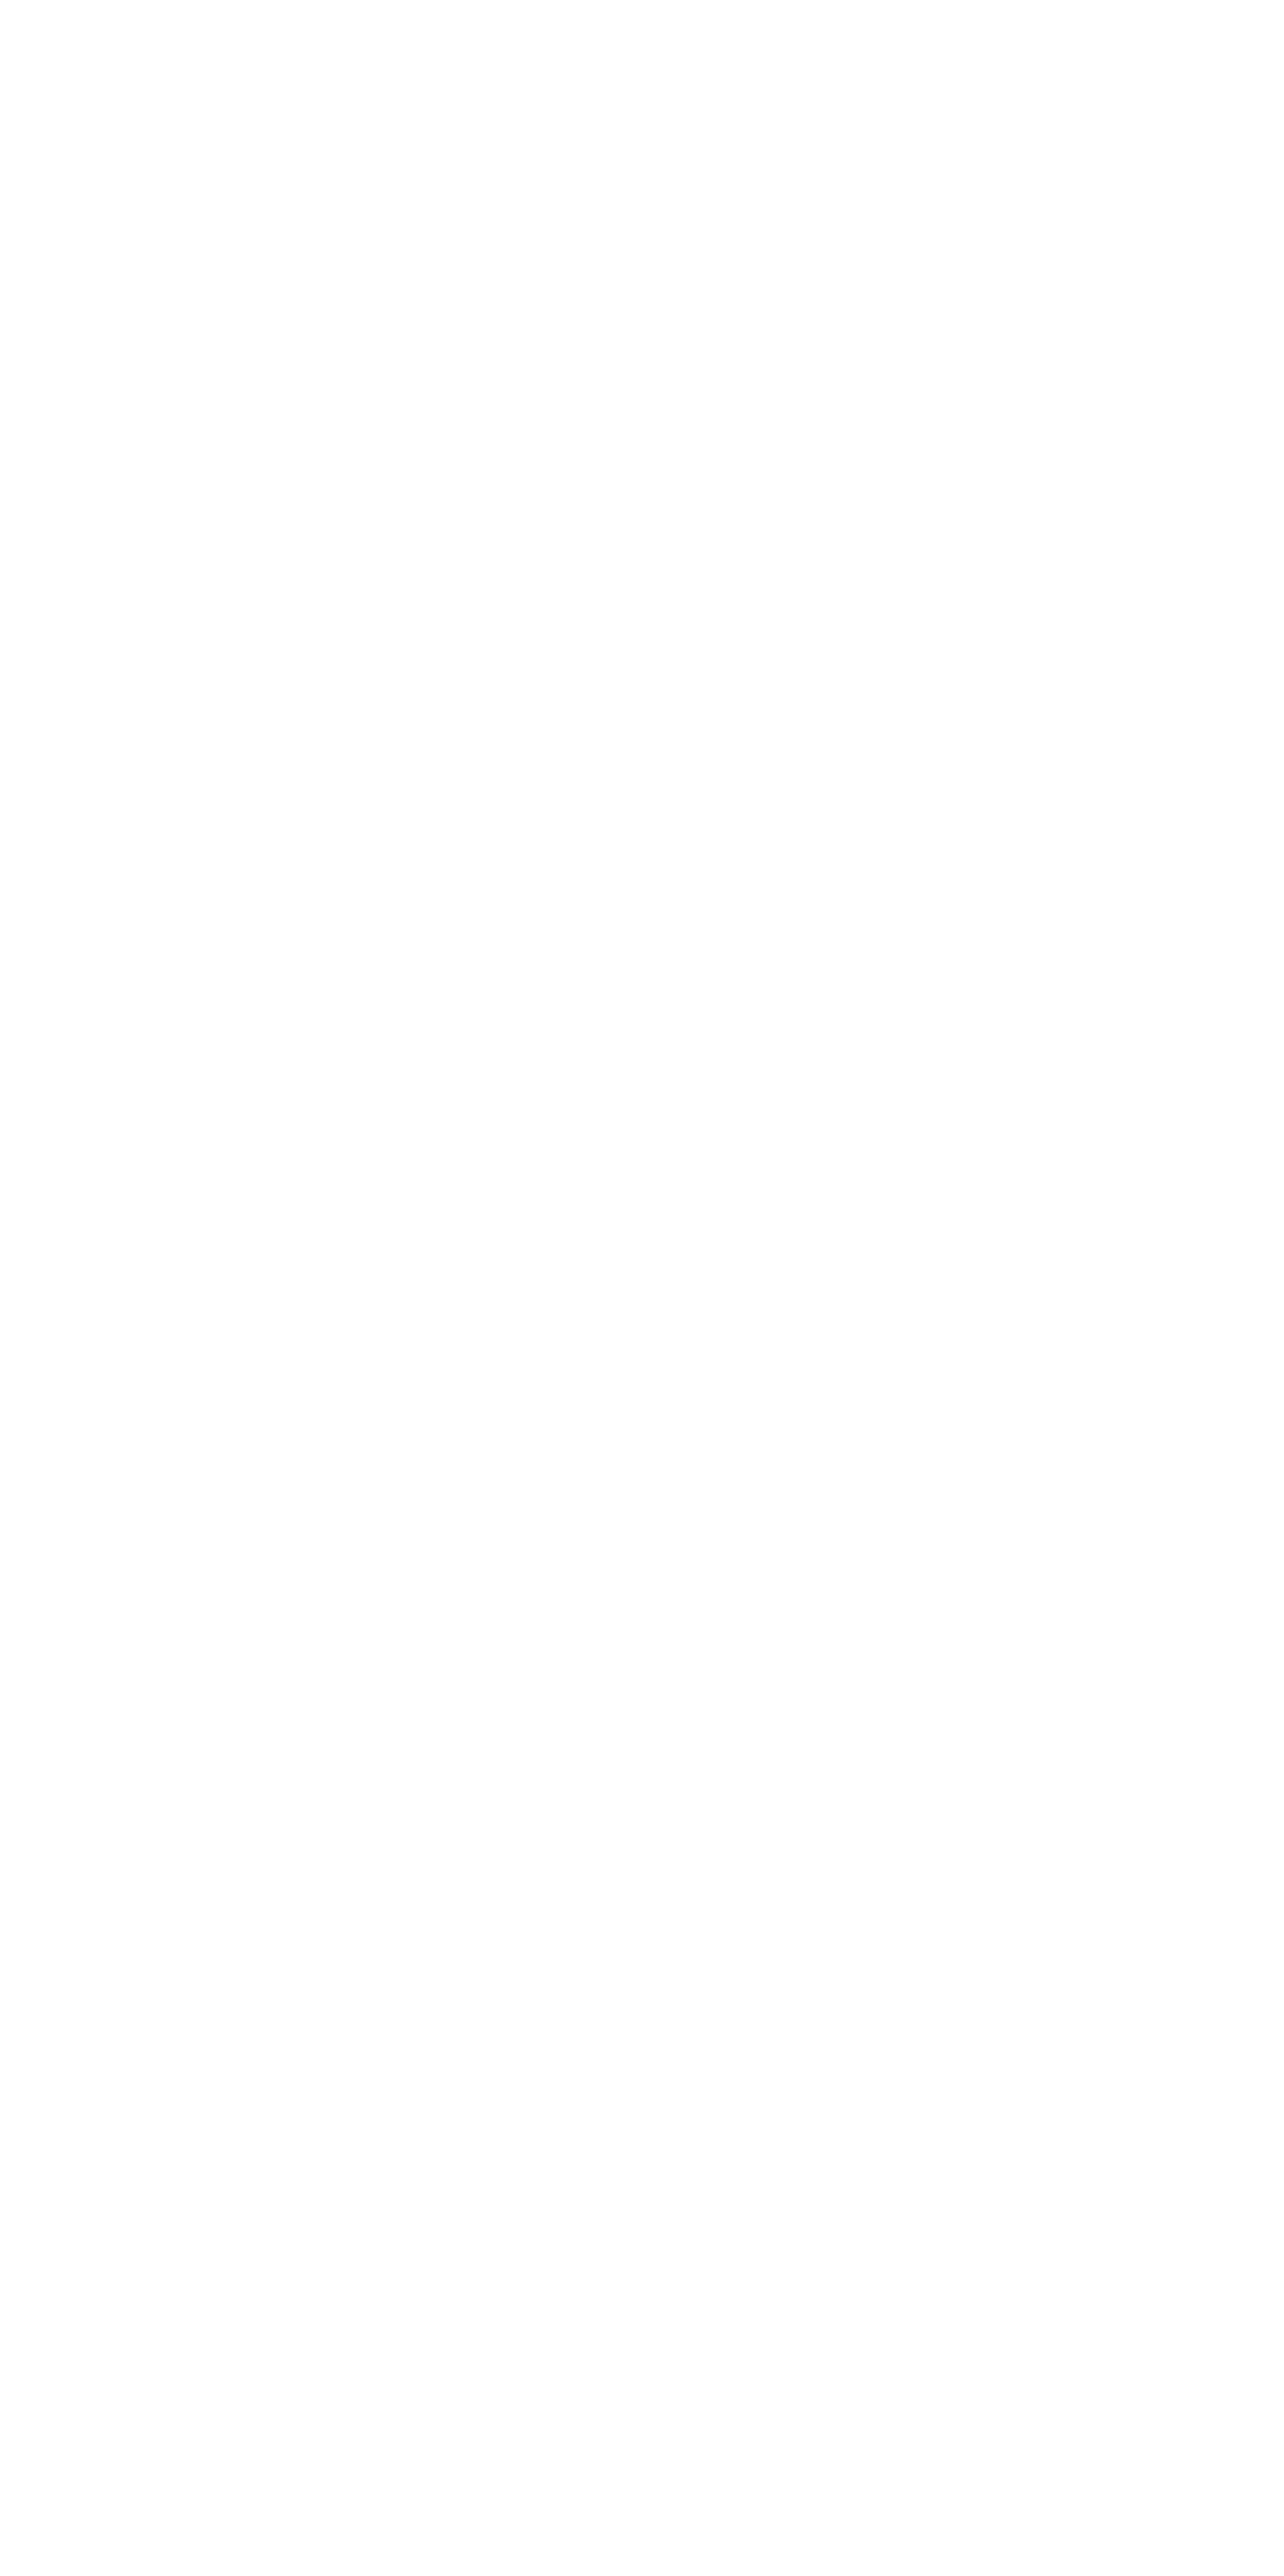

In [188]:
# segmentation with label image regions method / scikit-image
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])


def image_process_label(image):
    grayscale = rgb2gray(image)
#     print(grayscale)
    thresh = threshold_otsu(grayscale)
    bw = closing(grayscale > thresh, square(3))
    cleared = clear_border(bw)
    label_image = label(cleared)
    return label_image
# iage = plt.imread("C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/LAYOUT SEATGURU/Aer_Lingus_Airbus_A330-300_A_plane6.jpg")
# c = image_process_label(iage)
# c

def label_results(liste_images, path):
    ar_elmt = {}
    coor_rect_dic = {}
    diam_cercle_dic = {}
    coordinates_dic = {}
    for img in liste_images:
        # get the image
        image = plt.imread(
            path + img)
        # get the different area
        label_image = image_process_label(image)
        props = regionprops(label_image)
#         print(props)
        fig, ax = plt.subplots(figsize=(20, 40))
        # ax.imshow(image)
        area_list = []
        coor_rect = []
        diam_cercle = []
        coordinates = []
        for region in props:
            # bigger enough area chosen
            if region.area >= 50 :
                # draw rectangles around the defined areas
                minr, minc, maxr, maxc = region.bbox
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                ax.add_patch(rect)
                ax.set_axis_off()
                # plt.figure()
                # plt.tight_layout()  # lay out of the image and the rectangles
                area_list.append(region['Area'])  # Area of each region
                # Coordinate list of the rectangle edges
                coor_rect.append(region['BoundingBox'])
                # The diameter of a circle with the same area as the region
                diam_cercle.append(region['EquivDiameter'])
                # Coordinate list (row, col) of each region
                coordinates.append(region['Coordinates'])
        plt.tight_layout()
        # fig.savefig('/home/sid2018-6/Documents/proget_interpromo/images_couleur_squared/rect'
        # + img, dpi=90, bbox_inches='tight')
        ar_elmt[path+img] = area_list
        coor_rect_dic[path+img] = coor_rect
        diam_cercle_dic[path+img] = diam_cercle
        coordinates_dic[path+img] = coordinates
    return (ar_elmt, coor_rect_dic, diam_cercle_dic, coordinates_dic)

listt = os.listdir(
    "C:/Users/marce/Documents/RATATA")
c,v,g,t = label_results(listt,"C:/Users/marce/Documents/RATATA/")
# (liste1_aires, liste1_coor_rect, liste1_diam_cercle, liste1_coordinates) = label_results(
#     liste_prepro_images, "C:/Users/marce/Documents/interpromo_2020/images_test/")
#len(v["C:/Users/marce/Documents/RATATA/Aer_Lingus_Airbus_A330-300_A_plane6.jpg"])
v["C:/Users/marce/Documents/RATATA/Aer_Lingus_Airbus_A330-300_A_plane6.jpg"]

In [219]:
ouf = v["C:/Users/marce/Documents/RATATA/Aer_Lingus_Airbus_A330-300_A_plane6.jpg"]
iage = plt.imread("C:/Users/marce/Documents/RATATA/Aer_Lingus_Airbus_A330-300_A_plane6.jpg")
def to_rgb(image):
        return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
def draw_contour(image, name_img, pipeline_zone):
    image = to_rgb(image) # change color postion BGR to RGB
    # for each rectangles it will draw it on the image
    zones = []
    for rect in pipeline_zone:
        if rect[3] <340 :
            y, x = rect[0], rect[1]
            w, h = abs(x-rect[3]), abs(y-rect[2])
            zones.append(rect)
            image = cv2.rectangle(image, (x,y), (x+w, y+h),(0,0,255), 2)
    plt.figure(figsize=(20,40))
    plt.imshow(image)
    print (zones)
    print (len(zones))

[(177, 162, 199, 181), (182, 239, 192, 256), (236, 258, 258, 268), (239, 271, 256, 278), (243, 142, 253, 159), (243, 200, 253, 217), (448, 139, 467, 156), (448, 267, 467, 284), (453, 203, 463, 219), (501, 203, 511, 219), (951, 264, 975, 285), (955, 136, 973, 144), (955, 150, 973, 157), (1018, 202, 1028, 218), (1438, 136, 1456, 144), (1438, 262, 1456, 270), (1443, 203, 1453, 220), (1513, 203, 1523, 220)]
18


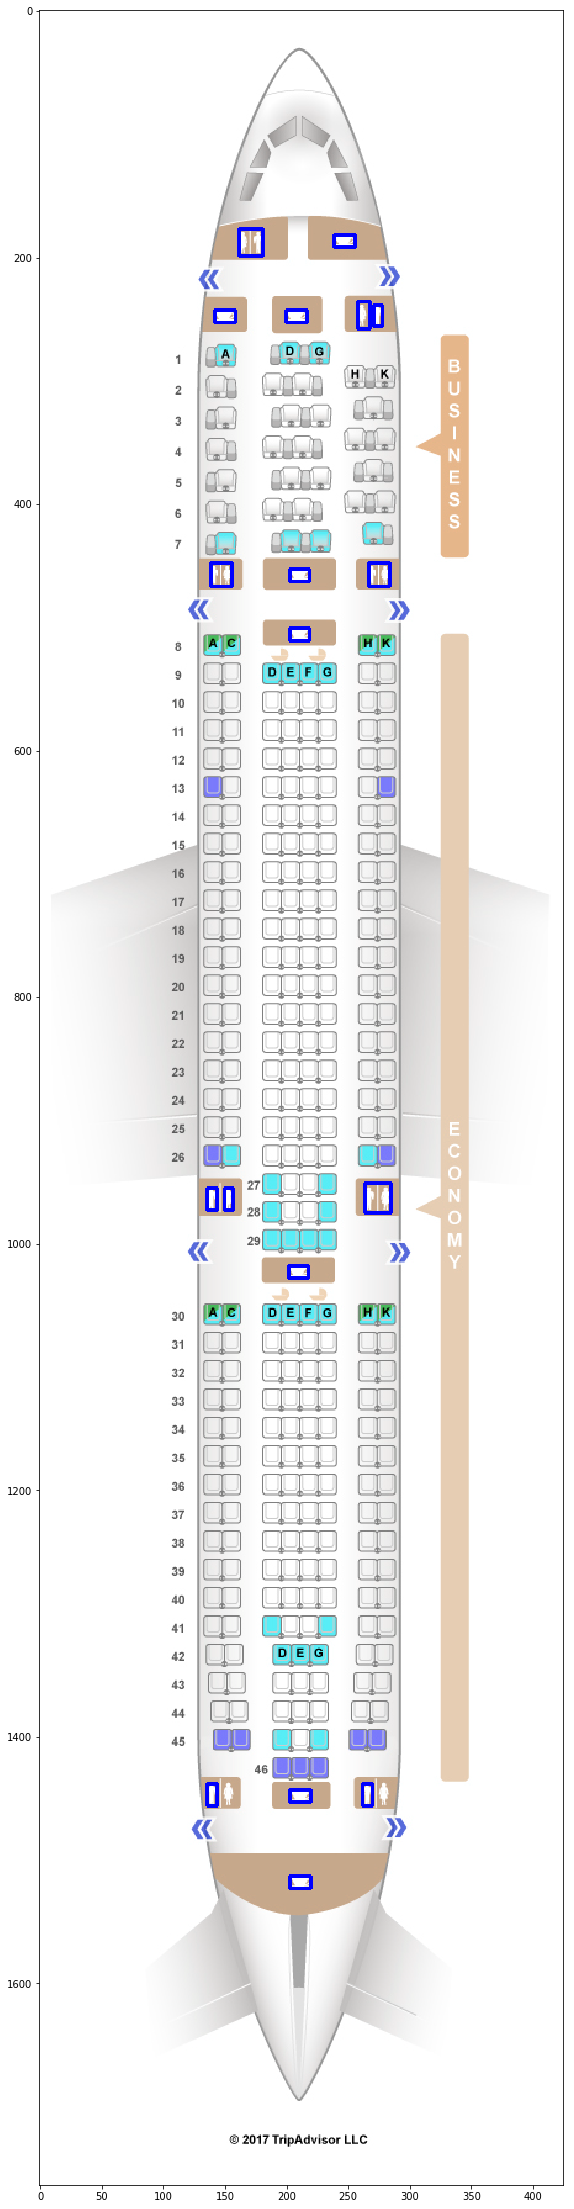

In [220]:
ouf_2 = draw_contour(iage, "Aer_Lingus_Airbus_A330-300_A_plane6.jpg", ouf)

In [262]:
# ouf_3=[(177, 162, 199, 181), (182, 239, 192, 256), (236, 258, 258, 268), (239, 271, 256, 278), (243, 142, 253, 159), (243, 200, 253, 217), (448, 139, 467, 156), (448, 267, 467, 284), (453, 203, 463, 219), (501, 203, 511, 219), (951, 264, 975, 285), (955, 136, 973, 144), (955, 150, 973, 157), (1018, 202, 1028, 218), (1438, 136, 1456, 144), (1438, 262, 1456, 270), (1443, 203, 1453, 220), (1513, 203, 1523, 220)]

# zones_dic = {}
# for rect in ouf_3 :
#     zones_2 = []
#     for rect_2 in ouf_3 :
        
#             zones_2.append(rect_2)
#     zones_dic[rect] = zones_2

# zones_dic

SyntaxError: invalid syntax (<ipython-input-262-99e646700944>, line 7)

In [200]:
pipeline_zone

NameError: name 'pipeline_zone' is not defined

## variables 

In [4]:
# Input list of pre-processed images
liste_prepro_images = os.listdir("C:/Users/marce/Documents/interpromo_2020"
                                 "/images_test")

# list of defined templates
liste_temp = os.listdir(
    "C:/Users/marce/Documents/interpromo_2020/templates/templates_to_use")

# path to access all images
data_path = 'C:/Users/marce/Documents/interpromo_2020/AllData/ANALYSE IMAGE/'

# list of both layouts
layouts = ['LAYOUT SEATGURU', 'LAYOUT SEATMAESTRO']

# image name used for test
image_name = 'Aer_Lingus_Airbus_A330-300_A_plane6.jpg'

# path to access pre-processed images
path_images_test = "C:/Users/marce/Documents/interpromo_2020/images_test/"

# empty directory
out_dir_temp = "C:/Users/marce/Documents/interpromo_2020/templates/"

# path to access all defined templates 
path_list_temp = "C:/Users/marce/Documents/interpromo_2020/templates/templates_to_use/"


## Function to save templates

In [17]:
# pip install Pillow==5.0.0
# analyzes and detects elements on pre-processed images (except uncolored seats)
# creates directories to save the detected elements
# saves all elements of the images in their respective directories

def save_templates(liste_images, path, out_dir, limit_area):
                # liste_images : list of pre-processed images
                # path : path to the pre-processed images
                # out_dir : path to an empty directory created beforehand
    #                    where the templates will be saved automatically
                # limit_area : limit dimension to crop image or not, by default 300

    # If out_dir doesn't exist, create the directory
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    for img in liste_images:

        # Initialize list of cropped templates
        cropped_images = []

        # Create new directory where the templates of the image will be saved
        new_dir = out_dir+img+"/"
        os.makedirs(new_dir)

        image = plt.imread(
            path + img)

        # Process the image
        label_image = image_process_label(image)

        # Detect regions of interest / elements
        props = regionprops(label_image)

        for region in props:

            # Bigger enough area chosen, by default 80
            if region.area >= limit_area:

                # Draw rectangles around the defined areas
                minr, minc, maxr, maxc = region.bbox
                rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                          fill=False, edgecolor='red', linewidth=2)
                plt.axes().add_patch(rect)

                # Crop region borders if too big
                if region.area > limit_area:
                    pad = 2
                    cropped_images.append(
                        image[minr+pad:maxr-pad, minc+pad:maxc-pad])
                    plt.axes().set_axis_off()
                    plt.figure()
                    plt.tight_layout()  # lay out of the image and the rectangles

                # Keep the dimension of the element
                else:
                    # pad <0 to reduct the rectangle dimension
                    # by default 0
                    pad = 0
                    cropped_images.append(
                        image[minr+pad:maxr-pad, minc+pad:maxc-pad])
                    plt.axes().set_axis_off()
                    plt.figure()
                    plt.tight_layout()  # lay out of the image and the rectangles

                # Save the cropped image / template
                for c, cropped_image in enumerate(cropped_images):
                    plt.imsave(new_dir + str(c) + ".png", cropped_image)


save_templates(liste_prepro_images, path_images_test,
               out_dir_temp, 80)

FileExistsError: [WinError 183] Impossible de créer un fichier déjà existant: 'C:/Users/marce/Documents/interpromo_2020/templates/Aegean_Airlines_Airbus_A320-200_plane2.svg.png/'

In [5]:
# pre-processing from V0, unchanged

COLOURS = {
    'LAYOUT SEATGURU': {
        'jpg': {
            "blue": [139, 168, 198],
            "yellow": [247, 237, 86],
            "exit": [222, 111, 100],
            "green": [89, 185, 71],
            "red_bad_seat": [244, 121, 123],
            "blue_seat_crew": [140, 169, 202],
            #                 "baby": [184,214,240]
        },
        'png': {
            "blue": [41, 182, 209],
            "yellow": [251, 200, 2],
            "exit": [190, 190, 190],
            "green": [41, 209, 135],
            "red_bad_seat": [226, 96, 82],
            "blue_seat_crew": [41, 182, 209],
            #                 "baby": [197,197,197]
        }
    },
    'LAYOUT SEATMAESTRO': {
        'png': {
            "blue": [81, 101, 181],
            "exit": [1, 120, 175],
            "green": [120, 189, 198],
            "red_bad_seat": [207, 90, 150],
            "blue_seat_crew": [138, 165, 190]
        }
    }
}

In [6]:
# pre-processing from V0, unchanged


class ImageUtil():
    def __init__(self, input_path, image_name, image=None):
        self.input_path = input_path
        self.image_name = image_name
        if image is None:
            self.image_pil = Image.open(self.input_path + self.image_name)
            self.image_plt = plt.imread(self.input_path + self.image_name)
            self.image = image
        else:
            self.image_pil = image
            self.image_plt = image
            self.image = image

        self.sort_pixel = {}

    def sort_pixel(self):
        """
            Sort the pixel value by number of occurences that they appear in the image
        """
        by_color = defaultdict(int)
        for pixel in self.image_pil.getdata():
            by_color[pixel] += 1

        self.sort_pixel = {k: v for k, v in sorted(
            by_color.items(), key=lambda item: item[1], reverse=True)}

    def visualisation(self, x_size, y_size):
        """
            Show the image
            params : 
                x_size - width of the plot
                y_size - height of the plot
        """
        plt.figure(figsize=(x_size, y_size))
        if self.image is not None:
            plt.imshow(self.image.astype('uint8'))
        else:
            plt.imshow(self.image_plt.astype('uint8'))

    def to_rgb(self):
        """
            Convert the image to an RGB format from a BGR format
        """
        return cv2.cvtColor(self.image_plt, cv2.COLOR_BGR2RGB)


class Colour():

    def __init__(self, input_path, layout, image_name):
        self.input_path = input_path
        self.layout = layout
        self.image_name = image_name
        self.image_extension = image_name.split('.')[-1]

        self.image = plt.imread(
            self.input_path + self.layout + '/' + self.image_name)
        self.image_util = ImageUtil(
            self.input_path + self.layout + '/', self.image_name)

    def colour_detection(self, colours, epsilon, rgb_len, colour_mode, default_colour):
        """
            This function will detect the colour and will do some pre-process on it
            params : 
                colours : a dictionnary with a list of specified colours
                epsilon : threshold that allows to consider a colour from another one as close
                rgb_len : only take the 3 first elements from pixel (RGB norm)
                colour_mode : 
                    if true : it means that if we consider a colour from the image close 
                    to a colour from the "colours" dict, then it will replace the colour 
                    by the one in the dict. 
                    if false : it means that if we consider a colour from the image close 
                    to a colour from the "colours" dict, then it will replace the colour 
                    by the default color value.
                default_color : default color value that a pixel has to take
        """
        # make a copy to avoid to erase the original image
        img_copy = self.image_util.to_rgb()

        # for each line we get the pixel value
        for i, line in enumerate(self.image):
            for j, pixel in enumerate(line):
                # Get only 3 first value corresponding to R,G,B
                pixel = [int(val) if val > 1.0 else int(val*255)
                         for val in self.image[i][j]][:rgb_len]

                # if we want to show a specific colour
                if colour_mode:
                    # default value
                    img_copy[i][j] = default_colour

                    # for each colour we change the pixel value if we find the same colour
                    for colour in colours.values():
                        if sum([1 if abs(p-b) < epsilon else 0 for p, b in zip(pixel, colour)]) == rgb_len:
                            img_copy[i][j] = colour

                # if we want to hide a colour by a default value
                else:
                    # default value
                    img_copy[i][j] = pixel

                    # for each recognized colour, we change it by the default value
                    for colour in colours.values():
                        if sum([1 if abs(p-b) < epsilon else 0 for p, b in zip(pixel, colour)]) == rgb_len:
                            img_copy[i][j] = default_colour
        return img_copy

    def colour_pipeline(self, colours={}, epsilon=20, colour_mode=True,
                        default_colour=[0, 0, 0], rgb_len=3):
        """
            Call colour_detection function in order to pre-process colours in image
            params : 
                colours : a dictionnary with a list of specified colours
                epsilon : threshold that allows to consider a colour from another one as close
                rgb_len : only take the 3 first elements from pixel (RGB norm)
                colour_mode : 
                    - if true (highlight colours in "colours" dict by standardize it) : it means that 
                    if we consider a colour from the image close to a colour from the "colours" dict, 
                    then it will replace the colour by the one in the dict. 
                    - if false (remove colours in "colours" dict by the default one) : it means that 
                    if we consider a colour from the image close to a colour from the "colours" dict, 
                    then it will replace the colour by the default color value.
                default_color : default color value that a pixel has to take
        """
        # if colours is empty we take the default value
        if not bool(colours):
            colours = COLOURS[self.layout][self.image_extension]

        # get the image result from colour decection pre-process wanted
        image_res = self.colour_detection(
            colours, epsilon, rgb_len, colour_mode, default_colour)

        return image_res

## Pattern matching - templates on a list of pre-processed images

In [7]:
# returns for each defined templates of a list the
# coordinates of the region they are in
# depends + of threshold used 

def coord_template_matching(liste_temp, path_temp, liste_images,
                            path_images, threshold):
                            # liste_temp : list of templates
                            # path_temp : path to access the list of templates
                            # liste_images : list of images
                            # path_images : path to access those images
                            # threshold : chosen, by default 0.9

    # Initialize the dictionnary which will display the results
    temp_rcgnzd = {}

    for img in liste_images:
        # Open image
        im_1 = cv2.imread(path_images+img, 0)

        # Initialize dictionnary of templates type for each image
        type_temp = {}

        for templ in liste_temp:
            # Initialize list of (all) coordinates for each recognized template
            liste_position = []
            # Open template
            template = cv2.imread(path_temp + templ, 0)
            h, w = template.shape

            # List of match
            res = cv2.matchTemplate(im_1, template, cv2.TM_CCOEFF_NORMED)

            position = [pos for pos in zip(*np.where(res >= threshold)[::-1])]

            for pos in position:
                # Draw rectangle around recognized element
                #cv2.rectangle(im_1, pos, (pos[0] + w, pos[1] + h), (255, 255, 255), 2)
                liste_position.append((pos[0], pos[1], h, w))

            type_temp[templ] = (liste_position)

        temp_rcgnzd[img] = (type_temp)

    return temp_rcgnzd


t = coord_template_matching(liste_temp, path_list_temp,
                            liste_prepro_images, path_images_test, 0.9)
t

{'Aegean_Airlines_Airbus_A320-200_plane2.svg.png': {'bar4.png': [],
  'bar5.png': [],
  'sortie_droit (2).png': [(272, 1243, 16, 23)],
  'sortie_droit.png': [],
  'sortie_gauche (2).png': [(131, 204, 16, 24),
   (126, 562, 16, 24),
   (130, 1243, 16, 24)],
  'sortie_gauche.png': [],
  'toilettes_2.png': [(233, 1203, 30, 55)]},
 'Aegean_Airlines_Airbus_A321-200_plane1.svg.png': {'bar4.png': [],
  'bar5.png': [],
  'sortie_droit (2).png': [(268, 204, 16, 23), (272, 1442, 16, 23)],
  'sortie_droit.png': [],
  'sortie_gauche (2).png': [(131, 204, 16, 24),
   (126, 507, 16, 24),
   (126, 562, 16, 24),
   (126, 1001, 16, 24),
   (130, 1442, 16, 24)],
  'sortie_gauche.png': [],
  'toilettes_2.png': [(233, 1375, 30, 55)]},
 'Aegean_Airlines_Airbus_A321-200_plane3.svg.png': {'bar4.png': [],
  'bar5.png': [],
  'sortie_droit (2).png': [(268, 204, 16, 23), (272, 1442, 16, 23)],
  'sortie_droit.png': [],
  'sortie_gauche (2).png': [(131, 204, 16, 24),
   (126, 507, 16, 24),
   (126, 562, 16, 24),


## summarized pre-processing function 

In [8]:
def preprocess_couleur(data_path, layout, image_name):
    col_obj = Colour(data_path, layouts[0], image_name)
    return col_obj.colour_pipeline(colours={}, epsilon=30, colour_mode=True,
                                   default_colour=[0, 0, 0], rgb_len=3).astype('uint8')

## Image detection results - dict of elements (detected) data

In [9]:
# returns the lists of areas of each region
# lists of rectangles coordinates of all the regions detected
# lists of diameters of each region
# lists of pixels coordinates of each region

def image_detection_result(image_name,
                           data_path, layouts, im_gray, im_pre, limit_area):
                            # image_name : image chosen
                            # data_path : path to access those images
                            # layouts : seatguru or seatmaestro
                            # limit_area : minimum dimension area, 80 by default

    # the result will be store in this list
    image_detection_result = []

    # detect the regions of an image
    label_image = image_process_label(im_pre)
    props = regionprops(label_image)
    
    # prepare the image info
    image_detection_result.append({
        'image_name': image_name,
        "areas": [],
        "rectangles": [],
        "diameters": [],
        "coordinates": []
    })

    # the last index in the list
    len_list = len(image_detection_result) - 1

    # by region find every rectangle that will interesting us
    for region in props:

        # bigger enough area chosen
        if region.area >= limit_area :
            image_detection_result[len_list]['areas'].append(region['Area'])
            image_detection_result[len_list]['rectangles'].append(
                region['BoundingBox'])
            image_detection_result[len_list]['diameters'].append(
                region['EquivDiameter'])
            image_detection_result[len_list]['coordinates'].append(
                region['Coordinates'])

    return image_detection_result



## pattern matching 2 - matching defined templates on an image to return coordinates of detected regions (they are in)

In [316]:
# for jpg only

def coord_template_matching_image_single(liste_temp, path_temp, image_name,
                                         data_path, layouts, threshold, limit_area):
                            # liste_temp : list of templates
                            # path_temp : path to access the list of templates
                            # image_name : image
                            # data_path : path to access the image
                            # layouts : list of layouts
                            # threshold : chosen, by default 0.9
                            # limit_area : minimum dimension area, 80 by default

    # Initialize the dictionnary which will display the results
    temp_rcgnzd = {}

    # Pre-process the image
    im_pre = preprocess_couleur(data_path, layouts, image_name)

    # Image rgb to gray
    im_gray = cv2.cvtColor(im_pre, cv2.COLOR_RGB2GRAY)

    dict_data = image_detection_result(image_name,
                                       data_path, layouts, im_gray, im_pre, 80)

    # Initialize dictionnary of templates type for the image
    type_temp = {}

    for templ in liste_temp:
        # Initialize list of (all) coordinates for each recognized template
        liste_position = []
        # Open template
        template = cv2.imread(path_temp + templ, 0)
        h, w = template.shape

        # List of match
        res = cv2.matchTemplate(im_gray, template, cv2.TM_CCOEFF_NORMED)

        position = [pos for pos in zip(*np.where(res >= threshold)[::-1])]

        for pos in position:
            # Draw rectangle around recognized element
            cv2.rectangle(
                im_gray, pos, (pos[0] + w, pos[1] + h), (255, 255, 255), 2)

            for rect in dict_data[0]['rectangles']:

                if pos[0] > rect[1] and pos[0] < rect[3] and pos[1] > rect[0] and pos[1] < rect[2]:

                    if rect not in liste_position:

                        liste_position.append(rect)

        type_temp[templ] = (liste_position)

        temp_rcgnzd[image_name] = type_temp

    return temp_rcgnzd


C:\Users\marce\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:58: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True
C:\Users\marce\Anaconda3\lib\site-packages\skimage\segmentation\_clear_border.py:60: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  borders[slicedim] = True


[1, 1, 1, 1, 1]

# VISUALISATION POUR CHEF

In [307]:
thres_1 = coord_template_matching_image_single(liste_temp, path_list_temp, image_name, data_path, layouts, 0.5, 80)
thres_2 = coord_template_matching_image_single(liste_temp, path_list_temp, image_name, data_path, layouts, 0.6, 80)
thres_3 = coord_template_matching_image_single(liste_temp, path_list_temp, image_name, data_path, layouts, 0.7, 80)
thres_4 = coord_template_matching_image_single(liste_temp, path_list_temp, image_name, data_path, layouts, 0.8, 80)
thres_5 = coord_template_matching_image_single(liste_temp, path_list_temp, image_name, data_path, layouts, 0.9, 80)

{'bar4.png': [(167, 218, 203, 282),
  (232, 132, 261, 169),
  (232, 189, 262, 230),
  (445, 182, 470, 241),
  (495, 182, 515, 241),
  (1012, 181, 1032, 240),
  (1437, 189, 1459, 236),
  (1495, 139, 1550, 284)],
 'bar5.png': [(167, 218, 203, 282),
  (232, 189, 262, 230),
  (232, 132, 261, 169),
  (445, 130, 470, 165),
  (445, 182, 470, 241),
  (445, 257, 470, 292),
  (495, 182, 515, 241),
  (1012, 181, 1032, 240),
  (1437, 189, 1459, 236),
  (1495, 139, 1550, 284)],
 'sortie_droit (2).png': [],
 'sortie_droit.png': [(208, 277, 224, 293), (1000, 285, 1015, 301)],
 'sortie_gauche (2).png': [],
 'sortie_gauche.png': [(999, 121, 1015, 137)],
 'toilettes_2.png': [(167, 218, 203, 282),
  (168, 140, 203, 202),
  (1495, 139, 1550, 284)]}

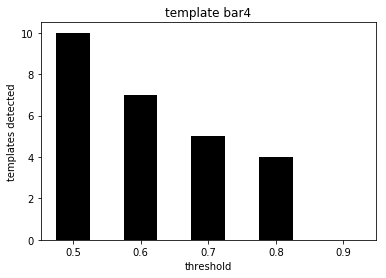

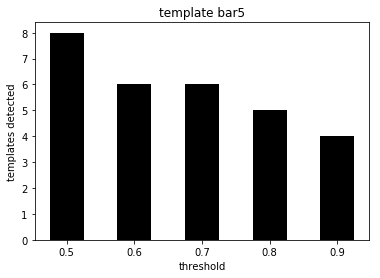

In [305]:
import matplotlib.pyplot as plt
import numpy as np

thres=[]
for i in range (5,10):
    th = len(coord_template_matching_image_single(liste_temp, path_list_temp, image_name, data_path, layouts, i*0.1, 80))
    thres.append(th)
thres

x1=len(thres_1['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['bar5.png'])
x2=len(thres_2['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['bar5.png'])
x3=len(thres_3['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['bar5.png'])
x4=len(thres_4['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['bar5.png'])
x5=len(thres_5['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['bar5.png'])

#thres for height
x = [0.5,0.6,0.7,0.8,0.9]
height = [x1,x2,x3,x4,x5]
width = 0.05

plt.bar(x, height, width, color='k')
plt.title("template bar4", fontdict=None, loc='center', pad=None)
plt.xlabel("threshold", fontdict=None)
plt.ylabel("templates detected", fontdict=None)
plt.show()

c1=len(thres_1['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['bar4.png'])
c2=len(thres_2['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['bar4.png'])
c3=len(thres_3['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['bar4.png'])
c4=len(thres_4['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['bar4.png'])
c5=len(thres_5['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['bar4.png'])

x = [0.5,0.6,0.7,0.8,0.9]
height = [c1,c2,c3,c4,c5]
width = 0.05

plt.bar(x, height, width, color='k')
plt.title("template bar5", fontdict=None, loc='center', pad=None)
plt.xlabel("threshold", fontdict=None)
plt.ylabel("templates detected", fontdict=None)
plt.show()

#best bar template = bar5.png

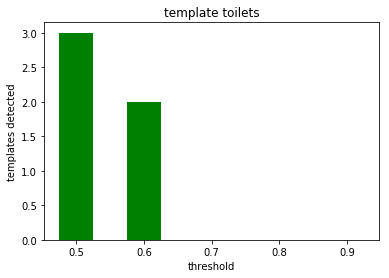

In [309]:
import matplotlib.pyplot as plt
import numpy as np

#len(thres_1)

t1=len(thres_1['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['toilettes_2.png'])
t2=len(thres_2['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['toilettes_2.png'])
t3=len(thres_3['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['toilettes_2.png'])
t4=len(thres_4['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['toilettes_2.png'])
t5=len(thres_5['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['toilettes_2.png'])

x = [0.5,0.6,0.7,0.8,0.9]
height = [t1,t2,t3,t4,t5]
width = 0.05

plt.bar(x, height, width, color='g')
plt.title("template toilets", fontdict=None, loc='center', pad=None)
plt.xlabel("threshold", fontdict=None)
plt.ylabel("templates detected", fontdict=None)
plt.show()



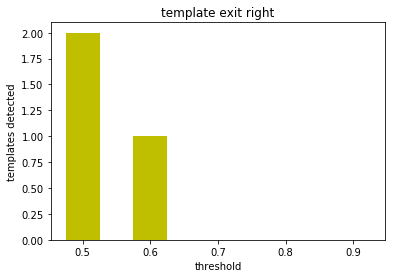

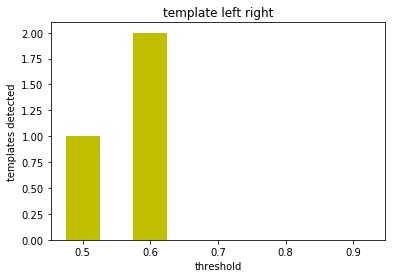

In [313]:
import matplotlib.pyplot as plt
import numpy as np

s1=len(thres_1['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['sortie_droit.png'])
s2=len(thres_2['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['sortie_droit.png'])
s3=len(thres_3['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['sortie_droit.png'])
s4=len(thres_4['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['sortie_droit.png'])
s5=len(thres_5['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['sortie_droit.png'])

x = [0.5,0.6,0.7,0.8,0.9]
height = [s1,s2,s3,s4,s5]
width = 0.05

plt.bar(x, height, width, color='y')
plt.title("template exit right", fontdict=None, loc='center', pad=None)
plt.xlabel("threshold", fontdict=None)
plt.ylabel("templates detected", fontdict=None)
plt.show()

ss1=len(thres_1['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['sortie_gauche.png'])
ss2=len(thres_2['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['sortie_gauche.png'])
ss3=len(thres_3['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['sortie_gauche.png'])
ss4=len(thres_4['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['sortie_gauche.png'])
ss5=len(thres_5['Aer_Lingus_Airbus_A330-300_A_plane6.jpg']['sortie_gauche.png'])

x = [0.5,0.6,0.7,0.8,0.9]
height = [ss1,ss2,ss3,ss4,ss5]
width = 0.05

plt.bar(x, height, width, color='y')
plt.title("template left right", fontdict=None, loc='center', pad=None)
plt.xlabel("threshold", fontdict=None)
plt.ylabel("templates detected", fontdict=None)
plt.show()
